In [8]:
import wandb
api = wandb.Api()
#run = api.run("<entity>/<project>/<run_id>")
run = api.run("renbotu/fno/fcuvm220")


In [9]:
run.history().columns

Index(['lr', '_timestamp', 'gradients/fno_blocks.convs.bias',
       'gradients/fno_blocks.norm.4.bias',
       'gradients/fno_blocks.norm.7.weight',
       'gradients/fno_blocks.mlp.1.fcs.1.bias', '_step', 'image_128',
       'gradients/projection.fc2.bias', 'gradients/fno_blocks.norm.1.bias',
       'gradients/fno_blocks.norm.2.bias',
       'gradients/fno_blocks.mlp.2.fcs.0.weight',
       'gradients/fno_blocks.mlp.2.fcs.1.weight', 'time',
       'gradients/fno_blocks.norm.5.weight',
       'gradients/fno_blocks.mlp.3.fcs.1.bias',
       'gradients/fno_blocks.fno_skips.2.weight',
       'gradients/fno_blocks.fno_skips.3.weight',
       'gradients/fno_blocks.mlp.3.fcs.0.weight',
       'gradients/fno_blocks.convs.weight.0.tensor',
       'gradients/fno_blocks.norm.1.weight',
       'gradients/fno_blocks.mlp.1.fcs.0.bias',
       'gradients/fno_blocks.convs.weight.5.tensor',
       'gradients/fno_blocks.convs.weight.7.tensor', '128_h1',
       'gradients/fno_blocks.norm.6.bias',
     

In [11]:
run.history()['time']

0           NaN
1     35.326052
2     35.273884
3     35.357315
4     35.415810
        ...    
95    36.451674
96    36.397874
97    36.338832
98    36.493192
99    36.281766
Name: time, Length: 100, dtype: float64

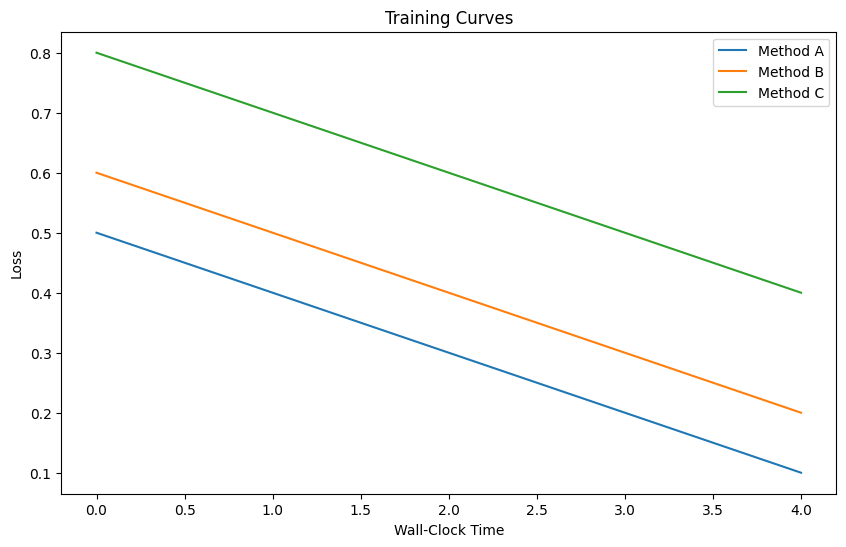

In [7]:
import matplotlib.pyplot as plt

def plot_training_curves(losses, methods):
    plt.figure(figsize=(10, 6))
    for loss, method in zip(losses, methods):
        plt.plot(loss, label=method)
    
    plt.xlabel('Wall-Clock Time')
    plt.ylabel('Loss')
    plt.title('Training Curves')
    plt.legend()
    #plt.grid(True)
    plt.show()

# Example usage:
losses = [
    [0.5, 0.4, 0.3, 0.2, 0.1],
    [0.6, 0.5, 0.4, 0.3, 0.2],
    [0.8, 0.7, 0.6, 0.5, 0.4]
]
methods = ['Method A', 'Method B', 'Method C']

plot_training_curves(losses, methods)

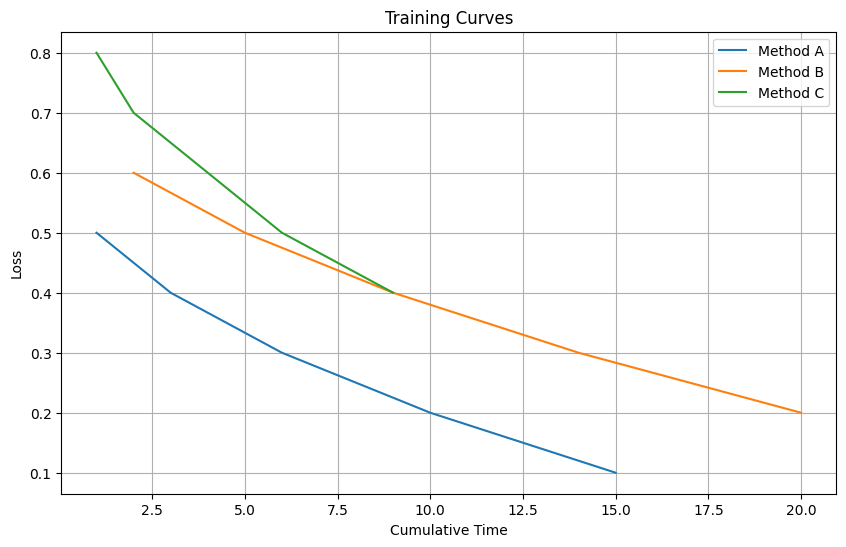

In [12]:
import numpy as np
def plot_training_curves(time, losses, methods):
    plt.figure(figsize=(10, 6))
    for t, loss, method in zip(time, losses, methods):
        cumulative_time = np.cumsum(t)  # Calculate cumulative time
        plt.plot(cumulative_time, loss, label=method)
    
    plt.xlabel('Cumulative Time')
    plt.ylabel('Loss')
    plt.title('Training Curves')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
time = [
    [1, 2, 3, 4, 5],  # Time spent on each epoch for Method A
    [2, 3, 4, 5, 6],  # Time spent on each epoch for Method B
    [1, 1, 2, 2, 3]   # Time spent on each epoch for Method C
]

losses = [
    [0.5, 0.4, 0.3, 0.2, 0.1],  # Losses at each epoch for Method A
    [0.6, 0.5, 0.4, 0.3, 0.2],  # Losses at each epoch for Method B
    [0.8, 0.7, 0.6, 0.5, 0.4]   # Losses at each epoch for Method C
]

methods = ['Method A', 'Method B', 'Method C']

plot_training_curves(time, losses, methods)

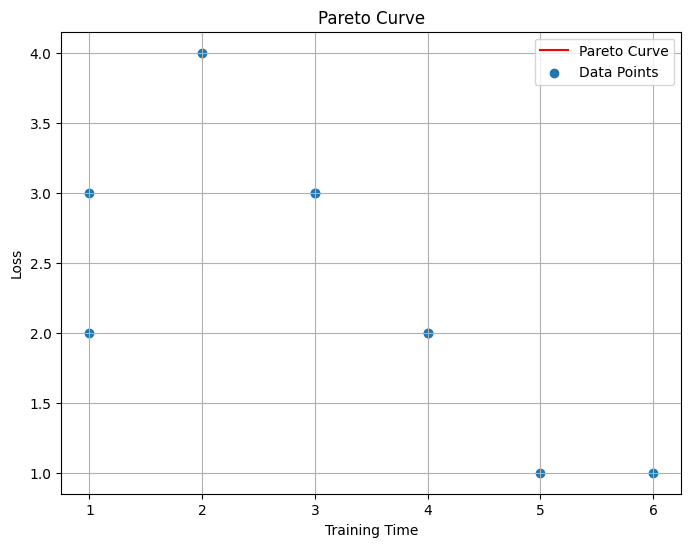

In [22]:
def plot_pareto_curve(training_time, loss):
    plt.figure(figsize=(8, 6))

    # Find the points with the least loss and training time
    min_loss = np.min(loss)
    min_training_time = np.min(training_time) 

    # Plot data points
    plt.scatter(training_time, loss, label='Data Points')

    # Filter the data for the Pareto curve
    pareto_points = []
    for tt, l in zip(training_time, loss):
        if tt <= min_training_time and l <= min_loss:
            pareto_points.append((tt, l))

    # Sort Pareto points based on training time
    pareto_points.sort(key=lambda x: x[0])

    # Extract Pareto curve points
    pareto_training_time = [pt[0] for pt in pareto_points]
    pareto_loss = [pt[1] for pt in pareto_points]

    # Plot Pareto curve
    plt.plot(pareto_training_time, pareto_loss, color='red', label='Pareto Curve')

    plt.xlabel('Training Time')
    plt.ylabel('Loss')
    plt.title('Pareto Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
training_time = [1,1,2,3, 3,4,4,5,6]
loss = [2,3,4,3,3,2,2,1,1]

plot_pareto_curve(training_time, loss)

In [ ]:
!pip install seaborn

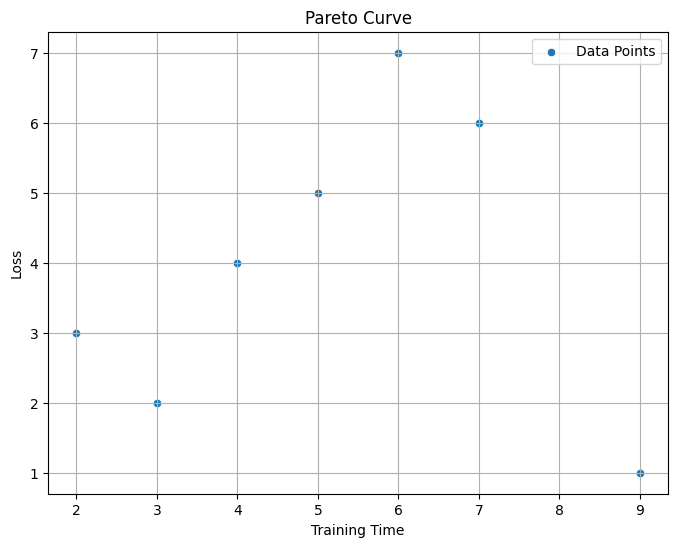

In [17]:
import seaborn as sns
import pandas as pd

def plot_pareto_curve(training_time, loss):
    data = pd.DataFrame({'Training Time': training_time, 'Loss': loss})
    pareto_data = data.copy()

    # Find the points with the least loss and training time
    min_loss = np.min(loss)
    min_training_time = np.min(training_time)

    # Filter the data for the Pareto curve
    pareto_data = pareto_data[(pareto_data['Loss'] <= min_loss) & (pareto_data['Training Time'] <= min_training_time)]

    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x='Training Time', y='Loss', label='Data Points')
    sns.lineplot(data=pareto_data, x='Training Time', y='Loss', color='red', label='Pareto Curve')

    plt.xlabel('Training Time')
    plt.ylabel('Loss')
    plt.title('Pareto Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
training_time = [2, 5, 3, 7, 4, 6, 9]
loss = [3, 5, 2, 6, 4, 7, 1]

plot_pareto_curve(training_time, loss)